# Use-Case:SVM,Random Forrests,K-Nearest Neighbors(KNN),and Logistic Regression classifition :digit dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm,ensemble,neighbors,linear_model

In [ ]:
#load digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

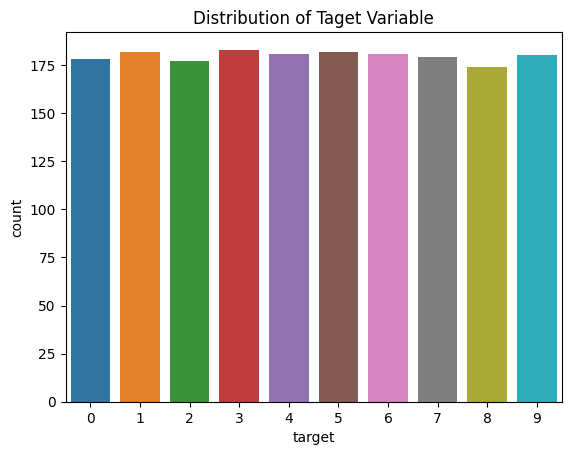

In [ ]:
#convert target to dataframe for seaborn
df_y = pd.DataFrame(y,columns=['target'])

sns.countplot(x='target',data=df_y)
plt.title('Distribution of Taget Variable')
plt.show()

In [ ]:
#split the data into training/testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

#Define the models
models = {
    'SVM': svm.SVC(kernel='linear',C=1,random_state=42),
    'Random Forest': ensemble.RandomForestClassifier(random_state=42),
    'KNN': neighbors.KNeighborsClassifier(),
    'Logistic Regression': linear_model.LogisticRegression(max_iter=10000,random_state=42)
}

In [ ]:
#Train the models and calculate the score
scores_train_val = {}
scores_cv = {}

for model_name in models:
  model = models[model_name]
  model.fit(X_train,y_train)
  scores_train_val[model_name]=model.score(X_test,y_test)
  scores_cv[model_name] = cross_val_score(model,X,y,cv=10).mean()

In [ ]:
print(f'Train/Validation scores : {scores_train_val}')
print(f'Cross-Validation scores : {scores_cv}')

Train/Validation scores : {'SVM': 0.9777777777777777, 'Random Forest': 0.9722222222222222, 'KNN': 0.9861111111111112, 'Logistic Regression': 0.9722222222222222}
Cross-Validation scores : {'SVM': 0.9604872749844816, 'Random Forest': 0.9493544382371197, 'KNN': 0.9716294227188081, 'Logistic Regression': 0.9276443202979516}


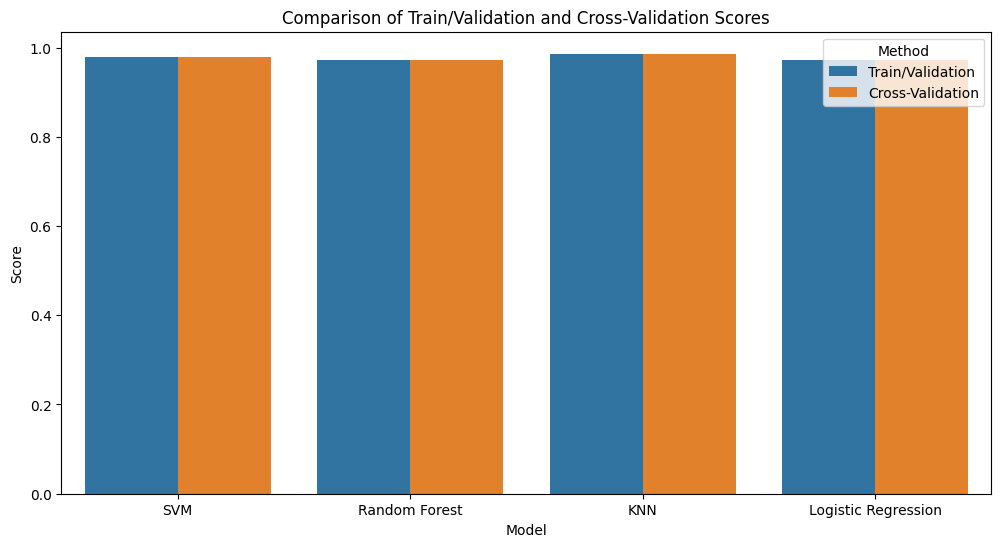

In [ ]:
#convert scores to dataframes for seaborn
df_scores_train_val = pd.DataFrame(scores_train_val.items(),columns=['Model','Score'])
df_scores_train_val['Method'] = 'Train/Validation'

df_scores_cv = pd.DataFrame(scores_train_val.items(),columns=['Model','Score'])
df_scores_cv['Method'] = 'Cross-Validation'

#concatenate dataframes and plot
df_scores = pd.concat([df_scores_train_val,df_scores_cv])


plt.figure(figsize=(12,6))
sns.barplot(x='Model',y='Score',hue='Method',data=df_scores)
plt.title('Comparison of Train/Validation and Cross-Validation Scores')
plt.show()